# Data-ink ratio and chartjunk

In [1]:
import os
from dotenv import load_dotenv, find_dotenv

import numpy as np
import csv
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl

import colorsys

In [2]:
# makes the inline-figures in notebooks look crisper
%config InlineBackend.figure_format = 'svg'

In [3]:
load_dotenv(find_dotenv(usecwd=True));
data_folder=os.getenv('DATA_FOLDER')

In [4]:
figsize_rect = (9, 5)
figsize_square = (8, 8)

fs_xl = 36 # titles
fs_l = 24 # subtitles
fs_m = 16 # axes and tick labels
fs_s = 14 # small stuff

In [5]:
colors_okabeito = ['#000000', '#E69F00', '#56B4E9', '#009E73', '#F0E442', '#0072B2', '#D55E00', '#CC79A7']

rgb_okabeito = [mpl.colors.hex2color(hex) for hex in colors_okabeito]

def rgb_adjust_ls(rgb, l=None, s=None):
    c = colorsys.rgb_to_hls(*rgb)
    if l==None:
        l=c[1]
    if s==None:
        s=c[2]
    return colorsys.hls_to_rgb(c[0], max(0.0, min(1.0, l)), max(0.0, min(1.0, s)))

# plot a grid of square patches from a list of color definitions
def plot_color_grid(colors):
    _, ax = plt.subplots(1, 1, figsize=(len(colors), 1))

    for i, color in enumerate(colors):
        rect = mpl.patches.Rectangle((i, 0), 1, 1, facecolor=color)
        ax.add_patch(rect)

    ax.set_xlim(0, len(colors))
    ax.set_ylim(0, 1)
    ax.axis('off')  # Hide axes
    plt.show()

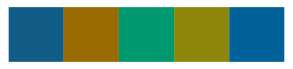

In [6]:
plot_color_grid([rgb_adjust_ls(rgb, l=0.3, s=None) for rgb in [rgb_okabeito[i] for i in [2,1,3,4,5]]])

In [7]:
def stamp(ax, color, alpha, label, clip_on=False, linewidth=5, fontsize=fs_m):
    ax.text(1.0, 1.0, label + "  ", color=color, alpha=alpha, fontsize=fontsize, weight='bold',
            va='top', ha='right', transform=ax.figure.transFigure, clip_on=clip_on)
    ax.add_patch(mpl.patches.ConnectionPatch(xyA=(1, 0), xyB=(1, 1), coordsA="figure fraction", 
                                         coordsB="figure fraction", axesA=ax, axesB=ax, 
                                         color=color, alpha=alpha, linewidth=linewidth,
                                         capstyle='butt', transform=ax.figure.transFigure))

def stamp_good(ax):
    stamp(ax, "olivedrab", 0.7, "good")

def stamp_phantom(ax):
    stamp(ax, "transparent", 0, "")

def stamp_bad(ax):
    stamp(ax, "#d02138", 1, "bad")

def stamp_wrong(ax):
    stamp(ax, "#8E202C", 1, "wrong")

def stamp_ugly(ax):
    stamp(ax, "#DC9515", 1, "ugly")

In [8]:
ais = pd.read_csv(os.path.join(data_folder, 'dataviz_data-raw', 'DAAG', 'ais.csv'))

FileNotFoundError: [Errno 2] No such file or directory: '/Users/schiba/data/vdss/dataviz_data-raw/DAAG/ais.csv'

In [10]:
ais['sp'] = ais['sport'].astype(str)

# Replace values in 'sport' column
ais['sport'] = ais['sp'].replace({
    "B_Ball": "basketball",
    "Field": "field",
    "Gym": "gymnastics",
    "Netball": "netball",
    "Row": "rowing",
    "Swim": "swimming",
    "T_400m": "track (400m)",
    "T_Sprnt": "track (sprint)",
    "Tennis": "tennis",
    "W_Polo": "water polo"
})

# Drop 'sp' column
ais = ais.drop('sp', axis=1)

# Rename columns
ais = ais.rename(columns={'ht': 'height', 'wt': 'weight'})

# Filter the DataFrame
male_Aus = ais[(ais['sex'] == 'm') & 
               (ais['sport'].isin(["basketball", "field", "swimming", "track (400m)",
                                  "track (sprint)", "water polo"]))]

# Replace values in 'sport' column
male_Aus['sport'] = male_Aus['sport'].replace({
    "track (400m)": "track",
    "track (sprint)": "track"
})

# Set the order of the 'sport' category
male_Aus['sport'] = pd.Categorical(male_Aus['sport'], categories=["field", "water polo", "basketball", "swimming", "track"])
male_Aus

NameError: name 'ais' is not defined

NameError: name 'male_Aus' is not defined

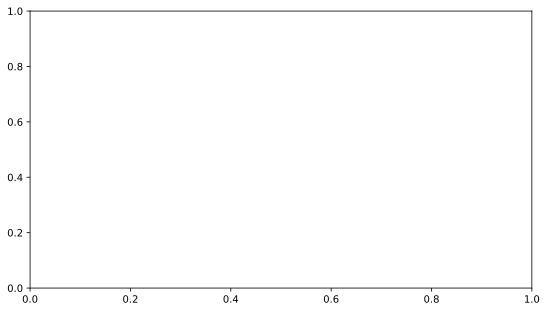

In [9]:
fig, ax = plt.subplots(figsize=(9, 5))

# Define colors for each sport
adjusted_okabeito = [rgb_adjust_ls(rgb, l=0.3, s=None) for rgb in [rgb_okabeito[i] for i in [2,1,3,4,5]]]
colors = {'field': adjusted_okabeito[0], 'water polo': adjusted_okabeito[1], 'basketball': adjusted_okabeito[2],
          'swimming': adjusted_okabeito[3], 'track': adjusted_okabeito[4]}

# Define marker types for each sport
markers = {'field': 'o', 'water polo': 's', 'basketball': 'D', 'swimming': '^', 'track': 'v'}

# Plot each sport
for sport in male_Aus['sport'].unique():
    ax.scatter(male_Aus[male_Aus['sport'] == sport]['height'], 
               male_Aus[male_Aus['sport'] == sport]['pcBfat'], 
               color=colors[sport], marker=markers[sport], s=60,
               label=sport, alpha=0.7)

# Set x and y limits
ax.set_xlim(168, 211)
ax.set_ylim(4, 21)

# Set x and y labels
ax.set_xlabel('height (cm)', fontsize=fs_m)
ax.set_ylabel('% body fat', fontsize=fs_m)

# Set x and y major ticks
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(10))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(5))

# Set x and y minor ticks
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(5))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(2.5))

# Remove ticks on the minor grid
ax.xaxis.set_tick_params(which='minor', size=0)
ax.yaxis.set_tick_params(which='minor', size=0)

# Increase the font size of the tick labels
ax.tick_params(axis='both', which='major', labelsize=fs_s)

# Set grid
ax.grid(which='major', color='black', linestyle='-', linewidth=1)
ax.grid(which='minor', color='gray', linestyle='-', linewidth=0.5)

# Move gridlines to the background
ax.set_axisbelow(True)

# Set thicker spines
for spine in ax.spines.values():
    spine.set_linewidth(1.5)

# Add legend
legend = ax.legend(loc='center right', bbox_to_anchor=(1.35, 0.5), borderaxespad=0.,
                   frameon=True, edgecolor='black', framealpha=1,
                   title='sport', title_fontsize=fs_m, prop=mpl.font_manager.FontProperties(size=fs_s))
legend.get_frame().set_linewidth(1.5)

# Shrink the plot area
plt.subplots_adjust(right=0.75)

stamp_ugly(ax)

# Show the plot
plt.show()

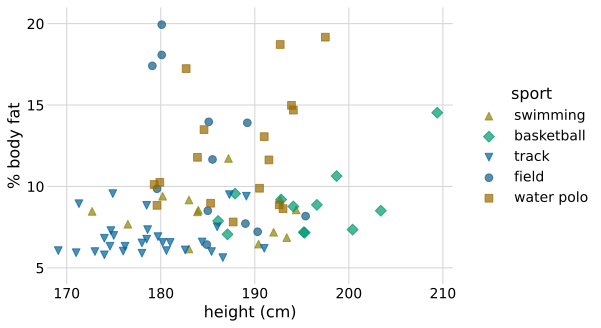

In [90]:
fig, ax = plt.subplots(figsize=(9, 5))

# Define colors for each sport
adjusted_okabeito = [rgb_adjust_ls(rgb, l=0.3, s=None) for rgb in [rgb_okabeito[i] for i in [2,1,3,4,5]]]
colors = {'field': adjusted_okabeito[0], 'water polo': adjusted_okabeito[1], 'basketball': adjusted_okabeito[2],
          'swimming': adjusted_okabeito[3], 'track': adjusted_okabeito[4]}

# Define marker types for each sport
markers = {'field': 'o', 'water polo': 's', 'basketball': 'D', 'swimming': '^', 'track': 'v'}

# Plot each sport
for sport in male_Aus['sport'].unique():
    ax.scatter(male_Aus[male_Aus['sport'] == sport]['height'], 
               male_Aus[male_Aus['sport'] == sport]['pcBfat'], 
               color=colors[sport], marker=markers[sport], s=60,
               label=sport, alpha=0.7)

# Set x and y limits
ax.set_xlim(168, 211)
ax.set_ylim(4, 21)

# Set x and y labels
ax.set_xlabel('height (cm)', fontsize=fs_m)
ax.set_ylabel('% body fat', fontsize=fs_m)

# Set x and y major ticks
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(10))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(5))

# Remove ticks on the minor grid
ax.xaxis.set_tick_params(which='both', size=0)
ax.yaxis.set_tick_params(which='both', size=0)

# Increase the font size of the tick labels
ax.tick_params(axis='both', which='major', labelsize=fs_s)

# Set grid
ax.grid(which='major', color='lightgrey', linestyle='-', linewidth=1.0)

# Move gridlines to the background
ax.set_axisbelow(True)

# Set thicker spines
for spine in ax.spines.values():
    spine.set_linewidth(0)

# Add legend
legend = ax.legend(loc='center right', bbox_to_anchor=(1.35, 0.5), borderaxespad=0.,
                   frameon=False, edgecolor='black', framealpha=1,
                   title='sport', title_fontsize=fs_m, prop=mpl.font_manager.FontProperties(size=fs_s))
legend.get_frame().set_linewidth(1.5)

# Shrink the plot area
plt.subplots_adjust(right=0.75)

# Show the plot
plt.show()

NameError: name 'male_Aus' is not defined

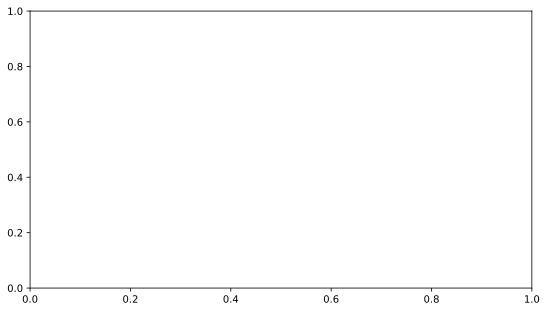

In [11]:
fig, ax = plt.subplots(figsize=(9, 5))

# Define colors for each sport
adjusted_okabeito = [rgb_adjust_ls(rgb, l=0.3, s=None) for rgb in [rgb_okabeito[i] for i in [2,1,3,4,5]]]
colors = {'field': adjusted_okabeito[0], 'water polo': adjusted_okabeito[1], 'basketball': adjusted_okabeito[2],
          'swimming': adjusted_okabeito[3], 'track': adjusted_okabeito[4]}

# Define marker types for each sport
markers = {'field': 'o', 'water polo': 's', 'basketball': 'D', 'swimming': '^', 'track': 'v'}

# Plot each sport
for sport in male_Aus['sport'].unique():
    ax.scatter(male_Aus[male_Aus['sport'] == sport]['height'], 
               male_Aus[male_Aus['sport'] == sport]['pcBfat'], 
               color=colors[sport], marker=markers[sport], s=60,
               label=sport, alpha=0.7)

# Set x and y limits
ax.set_xlim(168, 211)
ax.set_ylim(4, 21)

# Set x and y labels
ax.set_xlabel('height (cm)', fontsize=fs_s, color='lightgrey')
ax.set_ylabel('% body fat', fontsize=fs_s, color='lightgrey')

# Set x and y major ticks
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(10))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(5))

# Set ticks on the major grid
ax.xaxis.set_tick_params(which='both', size=5, color='lightgrey')
ax.yaxis.set_tick_params(which='both', size=5, color='lightgrey')

# Increase the font size of the tick labels
ax.tick_params(axis='both', which='major', labelsize=10, colors='lightgrey')

# Remove grid
ax.grid(False)

# Set thicker spines
for spine in ax.spines.values():
    spine.set_linewidth(0)

# Add legend
legend = ax.legend(loc='center right', bbox_to_anchor=(1.35, 0.5), borderaxespad=0.,
                   frameon=False, edgecolor='black', framealpha=1,
                   title='sport', title_fontsize=fs_m, prop=mpl.font_manager.FontProperties(size=10))
legend.get_frame().set_linewidth(1.5)
legend.get_title().set_color('lightgrey')
for text in legend.get_texts():
    text.set_color('lightgrey')

# Shrink the plot area
plt.subplots_adjust(right=0.75)


stamp_ugly(ax)

# Show the plot
plt.show()

NameError: name 'male_Aus' is not defined

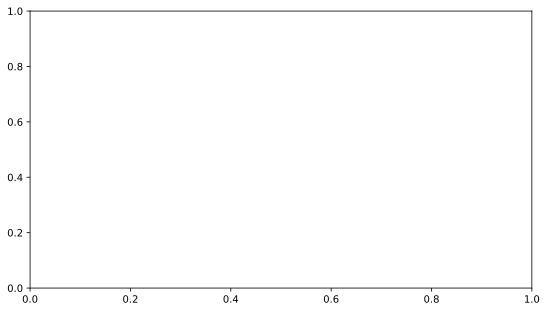

In [12]:
fig, ax = plt.subplots(figsize=(9, 5))

# Define colors for each sport
adjusted_okabeito = [rgb_adjust_ls(rgb, l=0.3, s=None) for rgb in [rgb_okabeito[i] for i in [2,1,3,4,5]]]
colors = {'field': adjusted_okabeito[0], 'water polo': adjusted_okabeito[1], 'basketball': adjusted_okabeito[2],
          'swimming': adjusted_okabeito[3], 'track': adjusted_okabeito[4]}

# Define marker types for each sport
markers = {'field': 'o', 'water polo': 's', 'basketball': 'D', 'swimming': '^', 'track': 'v'}

# Plot each sport
for sport in male_Aus['sport'].unique():
    ax.scatter(male_Aus[male_Aus['sport'] == sport]['height'], 
               male_Aus[male_Aus['sport'] == sport]['pcBfat'], 
               color=colors[sport], marker=markers[sport], s=60,
               label=sport, alpha=0.7)

# Set x and y limits
ax.set_xlim(168, 211)
ax.set_ylim(4, 21)

# Set x and y labels
ax.set_xlabel('height (cm)', fontsize=fs_m)
ax.set_ylabel('% body fat', fontsize=fs_m)

# Set x and y major ticks
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(10))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(5))

# Remove ticks on the minor grid
ax.xaxis.set_tick_params(which='both', size=0)
ax.yaxis.set_tick_params(which='both', size=0)

# Increase the font size of the tick labels
ax.tick_params(axis='both', which='major', labelsize=fs_s)

# Set grid
ax.grid(which='major', color='lightgrey', linestyle='-', linewidth=1.0)

# Move gridlines to the background
ax.set_axisbelow(True)

# Set thicker spines
for spine in ax.spines.values():
    spine.set_linewidth(1.5)
    spine.set_color('lightgrey')

# Add legend
legend = ax.legend(loc='center right', bbox_to_anchor=(1.35, 0.5), borderaxespad=0.,
                   frameon=False, edgecolor='black', framealpha=1,
                   title='sport', title_fontsize=fs_m, prop=mpl.font_manager.FontProperties(size=fs_s))
legend.get_frame().set_linewidth(1.5)

# Shrink the plot area
plt.subplots_adjust(right=0.75)

# Show the plot
plt.show()

In [13]:
Titanic = pd.read_csv(os.path.join(data_folder, 'dataviz_data-raw', 'titanic', 'Titanic.csv'))

# Assuming Titanic is a DataFrame
titanic_all = Titanic.drop(columns=['SexCode'])
titanic_all = titanic_all.rename(columns={'Name': 'name', 'PClass': 'class', 'Age': 'age', 'Sex': 'sex', 'Survived': 'survived'})

# Convert columns to string
titanic_all[['name', 'class', 'sex']] = titanic_all[['name', 'class', 'sex']].astype(str)

# Save DataFrame to a pickle file
# titanic_all.to_pickle('titanic_all.pkl')

titanic = titanic_all.drop(columns=['name']).dropna()

# Add a new column 'surv'
titanic = titanic.assign(surv = titanic['survived'].map({0: 'died', 1: 'survived'}))

# Create a grouped DataFrame
grouped = titanic.groupby(['class', 'surv', 'sex']).size().reset_index(name='counts')


In [14]:
grouped

,class,surv,sex,counts
0,1st,died,female,5
1,1st,died,male,82
2,1st,survived,female,96
3,1st,survived,male,43
4,2nd,died,female,10
5,2nd,died,male,106
6,2nd,survived,female,75
7,2nd,survived,male,21
8,3rd,died,female,56
9,3rd,died,male,184


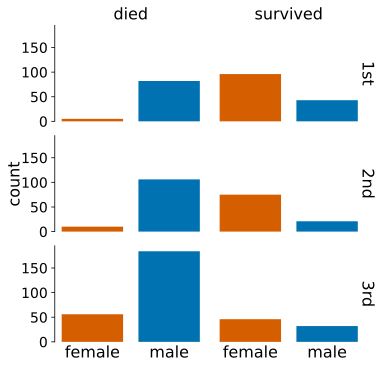

In [15]:
# Create subplots with shared y-axis on each row and shared x-axis on each column
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(5, 5), constrained_layout=True, sharey='row', sharex='col')

# Define colors for each sex
colors = {'male': '#0072B2', 'female': '#D55E00'}

cls_map = {'1st': 1, '2nd': 2, '3rd': 3}

# Plot each subplot
for (cls, surv), grp in grouped.groupby(['class', 'surv']):
    ax = axs.flatten()[(cls_map[cls]-1)*2 + (0 if surv == 'died' else 1)]
    ax.bar(grp['sex'], grp['counts'], color=grp['sex'].map(colors))
    if cls_map[cls] == 1:  # Add title only for the first row
        ax.set_title(f'{surv}', fontsize=fs_m)
    ax.set_ylim(0, 195)
    ax.yaxis.set_ticks(np.arange(0, 151, 50))  # Set y ticks at multiples of 50 between 0 and 150
    ax.tick_params(axis='y', labelsize=fs_s)  # Set y tick label size
    
    ax.tick_params(axis='x', length=0)  # Remove x tick marks
    # Add x ticks only for the last row
    if cls_map[cls] == 3:
        ax.xaxis.set_ticks(np.arange(2))  # Set x ticks at 0 and 1
        ax.tick_params(axis='x', length=0, labelsize=fs_m)  # Remove x tick marks and set x tick label size
    else:
        ax.xaxis.set_ticks([])  # Remove x ticks

    # Remove all spines in the right column, in the left column only keep the left spine
    if ((cls_map[cls]-1)*2 + (0 if surv == 'died' else 1)) % 2 == 0:
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
    else:
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)

        ax.tick_params(axis='y', length=0)  # Remove x tick marks

# Remove x labels
for ax in axs.flatten():
    ax.set_xlabel(None)

# Label each row with the cls-label on the right-hand side of each right plot
for i, label in enumerate(cls_map.keys()):
    axs[i, 1].yaxis.set_label_position("right")
    axs[i, 1].set_ylabel(label, rotation=270, labelpad=10, fontsize=fs_m)

# Add one shared label for the y-axis with text "count" on the middle row
fig.text(-0.03, 0.5, 'count', va='center', rotation='vertical',
         fontsize=fs_m)

plt.show()

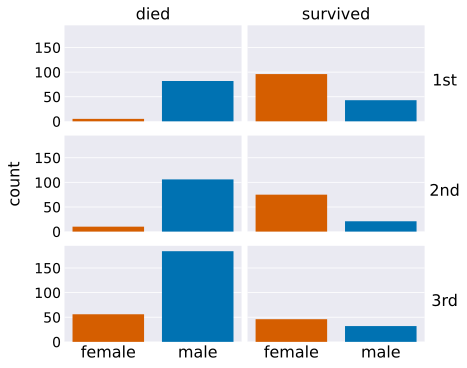

In [16]:
# Create subplots with shared y-axis on each row and shared x-axis on each column
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(6, 5), constrained_layout=True, sharey='row', sharex='col')

# Define colors for each sex
colors = {'male': '#0072B2', 'female': '#D55E00'}

cls_map = {'1st': 1, '2nd': 2, '3rd': 3}

# Plot each subplot
for (cls, surv), grp in grouped.groupby(['class', 'surv']):
    ax = axs.flatten()[(cls_map[cls]-1)*2 + (0 if surv == 'died' else 1)]
    ax.bar(grp['sex'], grp['counts'], color=grp['sex'].map(colors))
    if cls_map[cls] == 1:  # Add title only for the first row
        ax.set_title(f'{surv}', fontsize=fs_m)
    ax.set_ylim(0, 195)
    ax.yaxis.set_ticks(np.arange(0, 151, 50))  # Set y ticks at multiples of 50 between 0 and 150
    ax.tick_params(axis='y', labelsize=fs_s)  # Set y tick label size
    
    ax.tick_params(axis='x', length=0)  # Remove x tick marks
    # Add x ticks only for the last row
    if cls_map[cls] == 3:
        ax.xaxis.set_ticks(np.arange(2))  # Set x ticks at 0 and 1
        ax.tick_params(axis='x', length=0, labelsize=fs_m)  # Remove x tick marks and set x tick label size
    else:
        ax.xaxis.set_ticks([])  # Remove x ticks

    ax.spines[:].set_visible(False)

    ax.tick_params(axis='y', length=0)  # Remove x tick marks
    
    # Set background color and add horizontal gridlines
    ax.set_facecolor('#EAEAF2')
    ax.grid(axis='y', color='white')
    ax.set_axisbelow(True)

# Remove x labels
for ax in axs.flatten():
    ax.set_xlabel(None)

# Label each row with the cls-label on the right-hand side of each right plot
for i, label in enumerate(cls_map.keys()):
    axs[i, 1].yaxis.set_label_position("right")
    axs[i, 1].set_ylabel(label, rotation=0, labelpad=20, fontsize=fs_m)

# Add one shared label for the y-axis with text "count" on the middle row
fig.text(-0.02,0.5, 'count', va='center', rotation='vertical',
         ha='right', fontsize=fs_m)

plt.show()

In [17]:
# Define the stocks DataFrame
stocks = pd.DataFrame({
    'company': ['Alphabet', 'Apple', 'Facebook', 'Microsoft'],
    'ticker': ['GOOG', 'AAPL', 'FB', 'MSFT']
})

# Define a function to read a CSV file
def read_csv(filename):
    return pd.read_csv(os.path.join(data_folder, 'dataviz_data-raw', 'tech_stocks', filename))

# Add a new column 'file_contents' to the stocks DataFrame
stocks['file_contents'] = stocks['ticker'].apply(lambda x: read_csv(x.lower() + '.csv'))

# Unnest the 'file_contents' column
prices = pd.concat(stocks['file_contents'].tolist(), keys=stocks['ticker']).reset_index(level=1, drop=True).reset_index()

# Rename the columns
prices.rename(columns={'Date': 'date', 'Close': 'price'}, inplace=True)

# Convert the 'date' column to datetime
prices['date'] = pd.to_datetime(prices['date'], format='%d-%b-%y')

# Filter the prices DataFrame
index_prices = prices[prices['date'] == '2012-06-01'].rename(columns={'price': 'index_price'}).drop(columns=[ 'date']) # 'company',

# Merge the prices and index_prices DataFrames
prices = pd.merge(prices, index_prices, on='ticker')

# Add a new column 'price_indexed' to the prices DataFrame
prices['price_indexed'] = prices['price'] / prices['index_price'] * 100

# Assign the prices DataFrame to tech_stocks
tech_stocks = prices

In [193]:
tech_stocks

,ticker,date,Open_x,High_x,Low_x,price,Volume_x,Open_y,High_y,Low_y,index_price,Volume_y,price_indexed
0,GOOG,2017-06-02,969.46,975.88,966.00,975.60,1750955,285.61,286.04,283.89,285.20,-,342.075736
1,GOOG,2017-06-01,968.95,971.50,960.01,966.95,1410458,285.61,286.04,283.89,285.20,-,339.042777
2,GOOG,2017-05-31,975.02,979.27,960.18,964.86,2448067,285.61,286.04,283.89,285.20,-,338.309958
3,GOOG,2017-05-30,970.31,976.20,969.49,975.88,1466654,285.61,286.04,283.89,285.20,-,342.173913
4,GOOG,2017-05-26,969.70,974.98,965.03,971.47,1252010,285.61,286.04,283.89,285.20,-,340.627630
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9564,MSFT,2006-06-12,21.96,22.10,21.70,21.71,74338804,28.76,28.96,28.44,28.45,56641282,76.309315
9565,MSFT,2006-06-09,22.15,22.19,21.89,21.92,52575760,28.76,28.96,28.44,28.45,56641282,77.047452
9566,MSFT,2006-06-08,22.03,22.21,21.97,22.11,104127499,28.76,28.96,28.44,28.45,56641282,77.715290
9567,MSFT,2006-06-07,22.15,22.39,22.01,22.04,73830583,28.76,28.96,28.44,28.45,56641282,77.469244


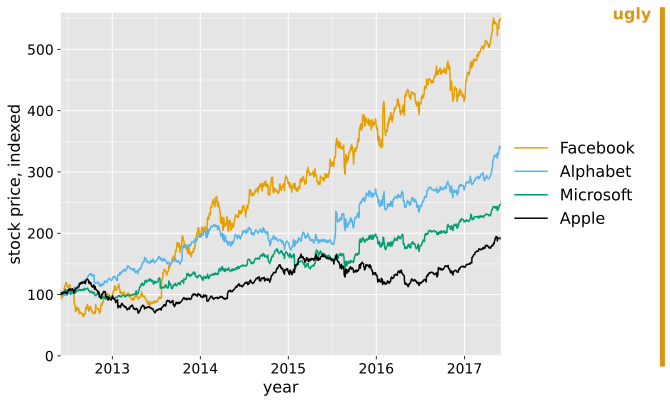

In [18]:
# Create a figure and an axis
fig, ax = plt.subplots(figsize=(9,5))

# Define the color palette
palette = {"FB": "#E69F00", "GOOG": "#56B4E9", "MSFT": "#009E73", "AAPL": "#000000"}

# Create a line plot for each ticker
for ticker in ['FB', 'GOOG', 'MSFT', 'AAPL']:
    ax.plot('date', 'price_indexed', data=tech_stocks[tech_stocks['ticker'] == ticker], color=palette[ticker],
            linewidth=1.5)

# Set the x and y limits
ax.set_xlim(pd.to_datetime('2012-06-01'), pd.to_datetime('2017-05-31'))
ax.set_ylim(0, 560)

# Set the x and y labels
ax.set_xlabel('year', fontsize=fs_m)
ax.set_ylabel('stock price, indexed', fontsize=fs_m)

# Set the legend
ax.legend(['Facebook', 'Alphabet', 'Microsoft', 'Apple'], loc='center left',
          frameon=False, bbox_to_anchor=(1, 0.5), fontsize=fs_m)

# Set the grid
ax.grid(True, which='both', color='white', linewidth=1)
ax.grid(True, which='minor', axis='y', linestyle='-', linewidth=0.5)
ax.grid(True, which='minor', axis='x', linestyle='-', linewidth=0.5)

# Set the background color
ax.set_facecolor('#e5e5e5')  # Hex RGB string for grey with 90% brightness

# Set the ticks color
ax.tick_params(colors='black', labelsize=fs_s)
ax.tick_params(which='minor', length=0)

# Set the plot margin
fig.subplots_adjust(left=0.07, right=0.75, bottom=0.03, top=0.985)  # Adjust right margin to make space for the legend

# Set minor y-gridlines at multiples of 50
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(50))

# Set minor x-gridlines at half year-intervals and major x-gridlines at full year intervals
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonth=7, bymonthday=1))
ax.xaxis.set_major_locator(mpl.dates.YearLocator())

# Set the x-tick labels on the major gridlines as full years
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%Y'))

ax.spines[:].set_visible(False)

stamp_ugly(ax)
plt.show()

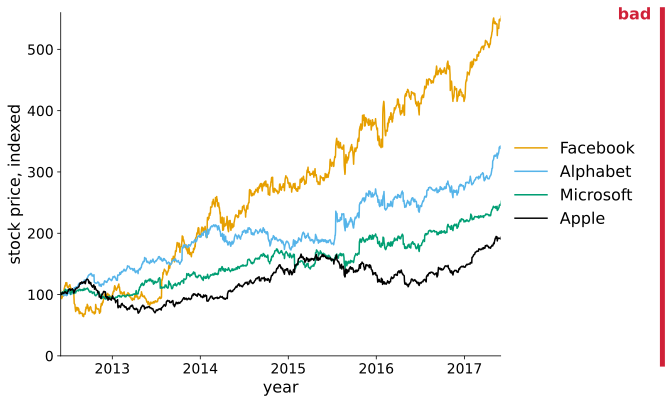

In [19]:
# Create a figure and an axis
fig, ax = plt.subplots(figsize=(9,5))

# Define the color palette
palette = {"FB": "#E69F00", "GOOG": "#56B4E9", "MSFT": "#009E73", "AAPL": "#000000"}

# Create a line plot for each ticker
for ticker in ['FB', 'GOOG', 'MSFT', 'AAPL']:
    ax.plot('date', 'price_indexed', data=tech_stocks[tech_stocks['ticker'] == ticker], color=palette[ticker],
            linewidth=1.5)

# Set the x and y limits
ax.set_xlim(pd.to_datetime('2012-06-01'), pd.to_datetime('2017-05-31'))
ax.set_ylim(0, 560)

# Set the x and y labels
ax.set_xlabel('year', fontsize=fs_m)
ax.set_ylabel('stock price, indexed', fontsize=fs_m)

# Set the legend
ax.legend(['Facebook', 'Alphabet', 'Microsoft', 'Apple'], loc='center left',
          frameon=False, bbox_to_anchor=(1, 0.5), fontsize=fs_m)

# Set the ticks color
ax.tick_params(colors='black', labelsize=fs_s)
ax.tick_params(which='minor', length=0)

# Set the plot margin
fig.subplots_adjust(left=0.07, right=0.75, bottom=0.03, top=0.985)  # Adjust right margin to make space for the legend

# Set minor y-gridlines at multiples of 50
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(50))

# Set minor x-gridlines at half year-intervals and major x-gridlines at full year intervals
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonth=7, bymonthday=1))
ax.xaxis.set_major_locator(mpl.dates.YearLocator())

# Set the x-tick labels on the major gridlines as full years
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%Y'))

for loc in ['top', 'right']:
    ax.spines[loc].set_visible(False)

stamp_bad(ax)
plt.show()

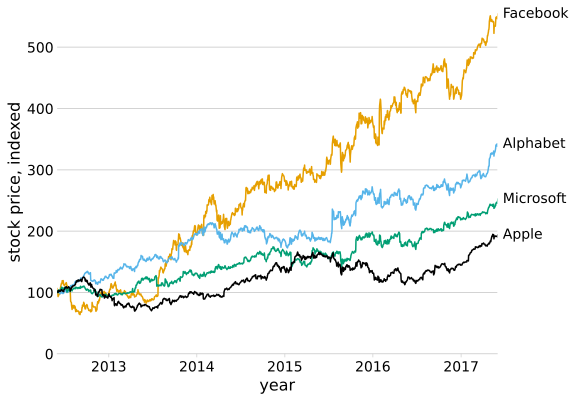

In [20]:
# Create a figure and an axis
fig, ax = plt.subplots(figsize=(9,5))

# Define the color palette
palette = {"FB": "#E69F00", "GOOG": "#56B4E9", "MSFT": "#009E73", "AAPL": "#000000"}

label_map = {"FB": "Facebook", "GOOG": "Alphabet", "MSFT": "Microsoft", "AAPL": "Apple"}

# Create a line plot for each ticker
for ticker in ['FB', 'GOOG', 'MSFT', 'AAPL']:
    ax.plot('date', 'price_indexed', data=tech_stocks[tech_stocks['ticker'] == ticker], color=palette[ticker],
            linewidth=1.5)
    # Add a label to the end of the line
    end_point = tech_stocks[tech_stocks['ticker'] == ticker].sort_values(by=['date']).iloc[-1]
    ax.annotate(label_map[ticker], (end_point['date'], end_point['price_indexed']),
                textcoords="offset points", xytext=(5,0), ha='left', va='center',
                fontsize=fs_s)

# Set the x and y limits
ax.set_xlim(pd.to_datetime('2012-06-01'), pd.to_datetime('2017-05-31'))
ax.set_ylim(0, 560)

# Set the x and y labels
ax.set_xlabel('year', fontsize=fs_m)
ax.set_ylabel('stock price, indexed', fontsize=fs_m)

# Set the grid
ax.grid(True, which='major', axis='y', color='lightgrey', linewidth=1)

# Remove the y-tick markers and set the ticks color
ax.tick_params(axis='y', which='both', colors='lightgrey', length=0, labelsize=fs_s, labelcolor='black')

# Set the x-axis tick labels to black
ax.tick_params(axis='x', which='major', labelsize=fs_s, labelcolor='black')

# Set the x-axis tick markers to light grey
ax.tick_params(axis='x', which='both', colors='lightgrey', labelcolor='black')

# Make the bottom spine light grey
ax.spines['bottom'].set_color('lightgrey')

# Set the plot margin
fig.subplots_adjust(left=0.07, right=0.75, bottom=0.03, top=0.985)  # Adjust right margin to make space for the legend

# Set minor y-gridlines at multiples of 50
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(50))

ax.xaxis.set_major_locator(mpl.dates.YearLocator())

# Set the x-tick labels on the major gridlines as full years
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%Y'))

for loc in ['top', 'right', 'left']:
   ax.spines[loc].set_visible(False)

plt.show()

In [21]:
# Filter the tech_stocks DataFrame and calculate the percent increase
perc_increase = tech_stocks[tech_stocks['date'] == '2017-06-01'].copy()
perc_increase['perc'] = 100 * (perc_increase['price'] - perc_increase['index_price']) / perc_increase['index_price']
perc_increase['label'] = perc_increase['perc'].round().astype(str) + '%'
perc_increase.sort_values('perc', inplace=True)

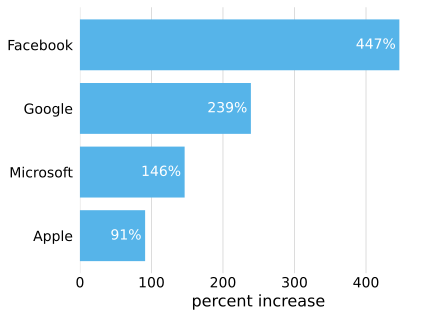

In [22]:
# Create a figure and an axis
fig, ax = plt.subplots()

# Map the bar labels to their corresponding names
label_map = {"FB": "Facebook", "GOOG": "Google", "MSFT": "Microsoft", "AAPL": "Apple"}
# Create a bar plot
bars = ax.barh([label_map[ticker] for ticker in perc_increase['ticker']], perc_increase['perc'], color='#56B4E9')

# Add the text labels
for bar in bars:
    width = bar.get_width()
    padding = 5  # Adjust this value to increase or decrease the padding
    ax.text(width - padding, bar.get_y() + bar.get_height() / 2, f'{width:.0f}%', va='center',
            ha='right', color='white', fontsize=fs_s)

# Set the x and y labels
ax.set_xlabel('percent increase', fontsize=fs_m)
ax.set_ylabel('')

# Set the x limit
ax.set_xlim(0, 499)

# Set major x-gridlines at multiples of 100 and color them lightgrey
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(100))
ax.grid(True, which='major', axis='x', color='lightgrey')

# Remove the y axis line and the ticks
for loc in ['left', 'top', 'right', 'bottom']:
    ax.spines[loc].set_visible(False)
ax.tick_params(left=False)
ax.tick_params(axis='x', length=0, labelsize=fs_s)

# Set the fontsize of bar labels on the y-axis
ax.tick_params(axis='y', labelsize=fs_s)

# Move gridlines to the background
ax.set_axisbelow(True)

plt.show()

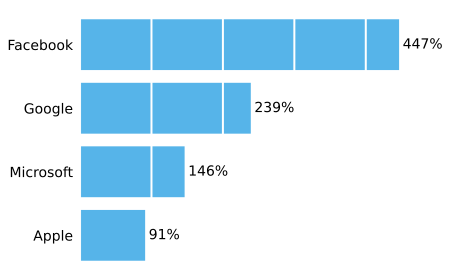

In [23]:
# Create a figure and an axis
fig, ax = plt.subplots()

# Map the bar labels to their corresponding names
label_map = {"FB": "Facebook", "GOOG": "Google", "MSFT": "Microsoft", "AAPL": "Apple"}
# Create a bar plot
bars = ax.barh([label_map[ticker] for ticker in perc_increase['ticker']], perc_increase['perc'], color='#56B4E9')

# Add the text labels
for bar in bars:
    width = bar.get_width()
    padding = 5  # Adjust this value to increase or decrease the padding
    ax.text(width + padding, bar.get_y() + bar.get_height() / 2, f'{width:.0f}%', va='center',
            ha='left', color='black', fontsize=fs_s)

# Set the x and y labels
ax.set_xlabel('')
ax.set_ylabel('')

# Set the x limit
ax.set_xlim(0, 499)

# Set major x-gridlines at multiples of 100 and color them lightgrey
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(100))
ax.grid(True, which='major', axis='x', color='white', linewidth=2)

# Remove the y axis line and the ticks
for loc in ['left', 'top', 'right', 'bottom']:
    ax.spines[loc].set_visible(False)
ax.tick_params(left=False, bottom=False)

# Set the fontsize of bar labels on the y-axis
ax.tick_params(axis='y', labelsize=fs_s)

# Remove the x-tick labels
ax.tick_params(axis='x', labelbottom=False)

# Move gridlines to the foreground
ax.set_axisbelow(False)

plt.show()